In [1]:
# Instalar pacotes necessários
!pip install pandas matplotlib

In [2]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
# Montar Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


,X1,X2,label
0,0.199049,0.174418,0
1,0.096752,0.285179,0
2,0.330680,0.231519,0
3,0.156186,0.194906,0
4,0.146850,0.309152,0


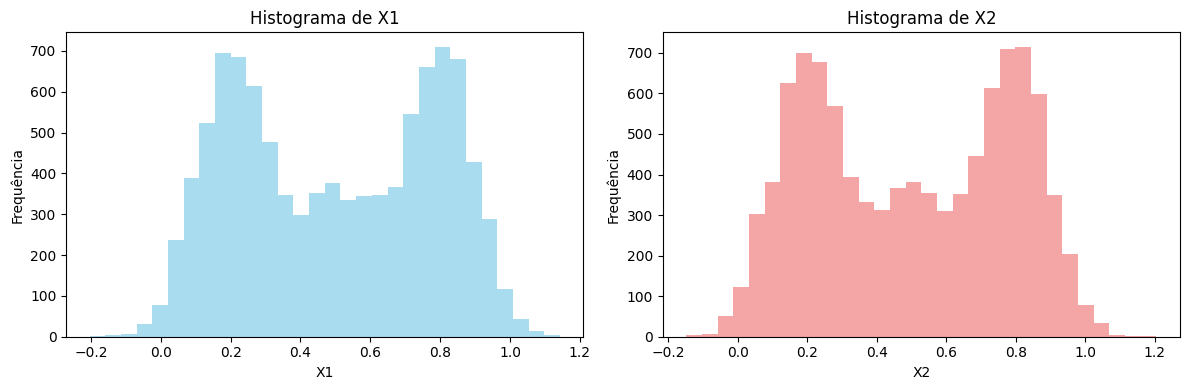

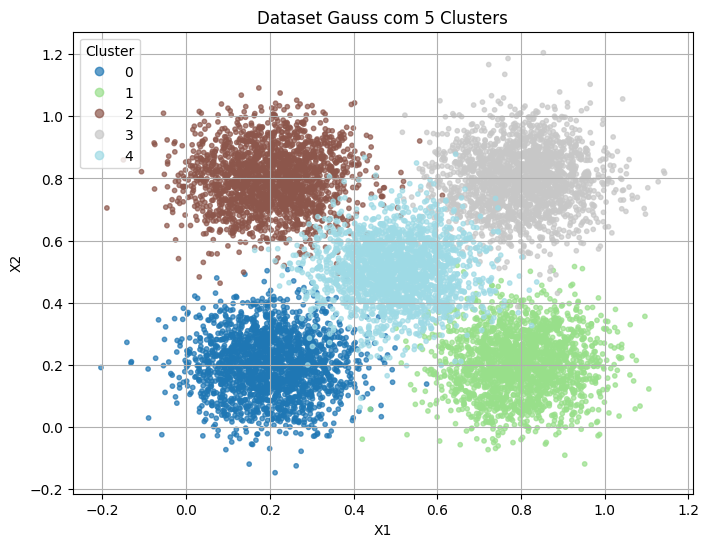

In [25]:
# Ler dataset do Google Drive (ajuste o caminho conforme necessário)
data = pd.read_csv('/content/drive/Othercomputers/Meu modelo Laptop/Aulas/UERJ/Redes Neurais/pratica 2 - RN/gauss_25_simulado.csv')


# Mostrar as primeiras linhas do dataset
display(data.head())

# Plotar histogramas de X1 e X2
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de X1
ax[0].hist(data['X1'], bins=30, color='skyblue', alpha=0.7)
ax[0].set_title('Histograma de X1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Frequência')

# Histograma de X2
ax[1].hist(data['X2'], bins=30, color='lightcoral', alpha=0.7)
ax[1].set_title('Histograma de X2')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Plotar gráfico de dispersão com clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['X1'], data['X2'], c=data['label'], cmap='tab20', alpha=0.7, s=10)
plt.title('Dataset Gauss com 5 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()

In [6]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6833 - loss: 1.2394 - val_accuracy: 0.9685 - val_loss: 0.7245
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9594 - loss: 0.7126 - val_accuracy: 0.9725 - val_loss: 0.6641
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.6576 - val_accuracy: 0.9735 - val_loss: 0.6046
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.5953 - val_accuracy: 0.9705 - val_loss: 0.5586
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.5494 - val_accuracy: 0.9730 - val_loss: 0.5271
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.5262 - val_accuracy: 0.9720 - val_loss: 0.5132
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9673 - loss: 0.5129 - val_accuracy: 0.9740 - val_loss: 0.5036
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9707 - loss: 0.5045 - val_accuracy: 0.9720 - val_

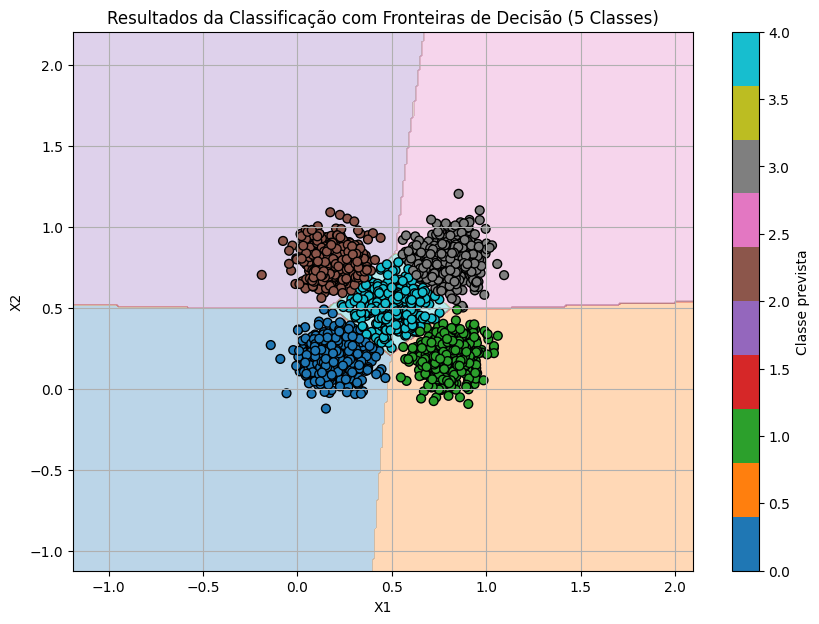

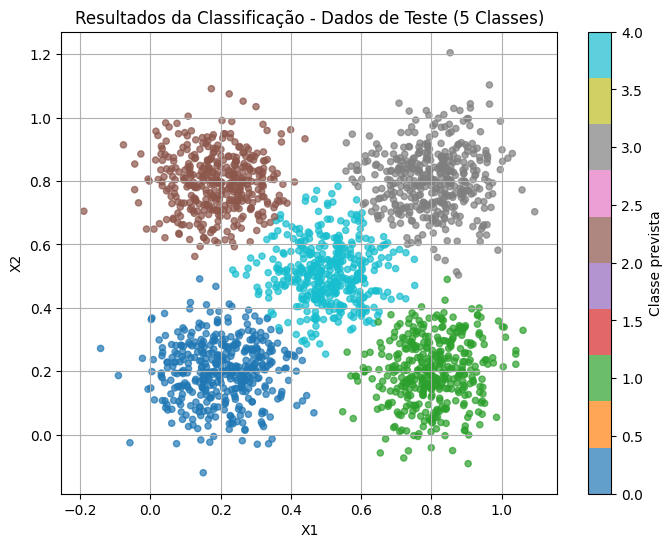

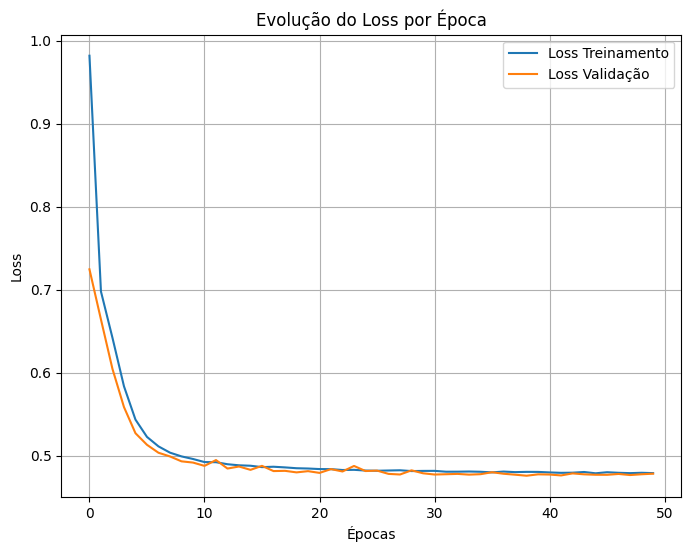

In [34]:
# Separar as features e o target
X = data[['X1', 'X2']]
y = data['label']
# X: contém as duas variáveis de entrada da rede (X1 e X2).
# y: contém a classe (0 a 4) de cada ponto.

# Dividir em conjunto de treino e teste (80% treino, 20% teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% para treino (X_train, y_train)
# 20% para teste (X_test, y_test)
# random_state=42 garante reprodutibilidade


# Criar a rede neural
model = Sequential([
    Dense(15, input_shape=(2,), activation='tanh'),
    Dense(5, activation='tanh')  # Camada de saída com 5 neurônios (1 por classe)
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Fazer previsões e gerar relatório de classificação
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))


# Definir limites do gráfico
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1

# Criar um grid para plotar a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Fazer previsões no grid
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Plotar os pontos de teste e a fronteira
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap='tab10', alpha=0.3)
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='tab10', edgecolor='k', s=40)
plt.title('Resultados da Classificação com Fronteiras de Decisão (5 Classes)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe prevista')
plt.show()


# Visualizar os dados classificados
plt.figure(figsize=(8, 6))
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='tab10', alpha=0.7, s=20)
plt.title('Resultados da Classificação - Dados de Teste (5 Classes)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe prevista')
plt.show()

# Plotar gráficos de loss de treino e validação
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


   Unnamed: 0        X1        X2  y
0           0  0.118647 -0.181079  0
1           1  0.022316 -0.088976  0
2           2  0.181717  0.072110  0
3           3  0.256028 -0.042128  0
4           4  0.250036  0.012372  0
Index(['Unnamed: 0', 'X1', 'X2', 'y'], dtype='object')


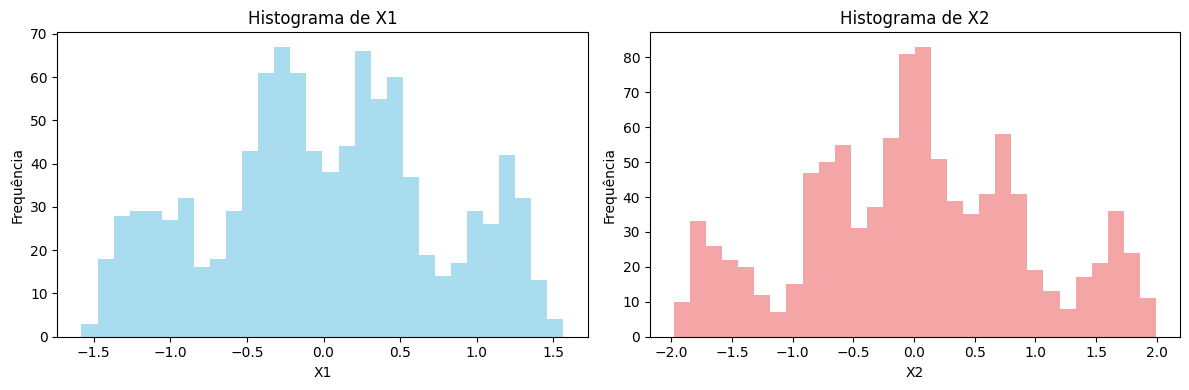

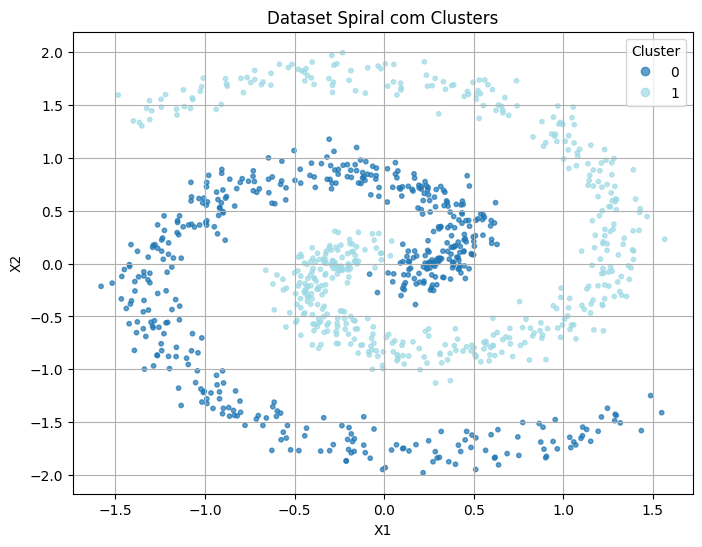

In [7]:
# Ler o dataset
spiral_data = pd.read_csv('/content/drive/Othercomputers/Meu modelo Laptop/Aulas/UERJ/Redes Neurais/pratica 2 - RN/spiral.csv')

# Mostrar as primeiras linhas do dataset
print(spiral_data.head())

# Verificar nomes das colunas
print(spiral_data.columns)

# Plotar histogramas de X1 e X2
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de X1
ax[0].hist(spiral_data['X1'], bins=30, color='skyblue', alpha=0.7)
ax[0].set_title('Histograma de X1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Frequência')

# Histograma de X2
ax[1].hist(spiral_data['X2'], bins=30, color='lightcoral', alpha=0.7)
ax[1].set_title('Histograma de X2')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Ajuste esta linha conforme o nome da coluna correta identificada acima
nome_coluna_cluster = 'y'

# Plotar gráfico de dispersão com clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(spiral_data['X1'], spiral_data['X2'], c=spiral_data[nome_coluna_cluster], cmap='tab20', alpha=0.7, s=10)
plt.title('Dataset Spiral com Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5341 - loss: 0.6282 - val_accuracy: 0.5050 - val_loss: 0.6181
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5237 - loss: 0.6118 - val_accuracy: 0.5450 - val_loss: 0.5988
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5155 - loss: 0.6102 - val_accuracy: 0.5450 - val_loss: 0.5790
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5811 - loss: 0.5743 - val_accuracy: 0.6850 - val_loss: 0.5385
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7532 - loss: 0.5253 - val_accuracy: 0.7850 - val_loss: 0.4922
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8102 - loss: 0.4939 - val_accuracy: 0.8500 - val_loss: 0.4468
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8907 - loss: 0.4159 - val_accuracy: 0.9200 - val_loss: 0.3891
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9271 - loss: 0.3860 - val_accuracy: 0.9050 - val_loss: 0.

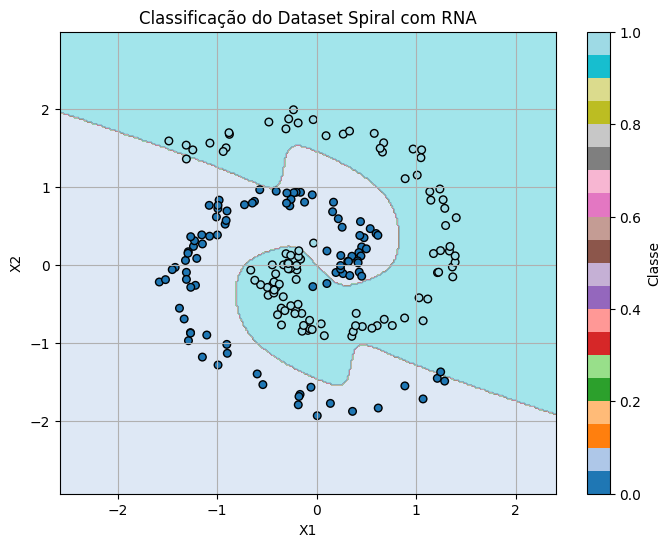

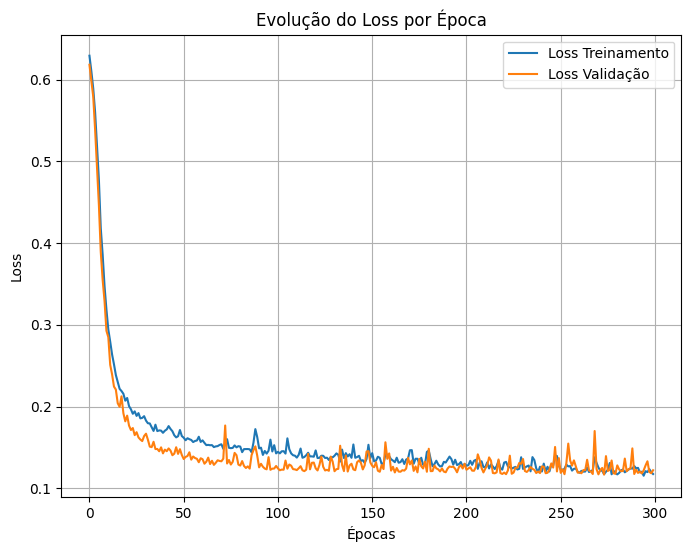

In [23]:
# Separar features e target
X = spiral_data[['X1', 'X2']]
y = spiral_data['y']

# Dividir o dataset (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(8, activation='tanh', input_shape=(2,)),
    #Dense(4, activation='tanh'),
    Dense(2, activation='linear')  # saída única com ativação sigmoid
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Treinar o modelo
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Fazer previsões no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

# Plotar gráfico com fronteiras de decisão
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='tab20', alpha=0.4)
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, cmap='tab20', edgecolor='k', s=30)
plt.title('Classificação do Dataset Spiral com RNA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe')
plt.show()

# Plotar gráficos de Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4759 - loss: 0.6991 - val_accuracy: 0.5200 - val_loss: 0.6900
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5421 - loss: 0.6896 - val_accuracy: 0.6500 - val_loss: 0.6845
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6505 - loss: 0.6755 - val_accuracy: 0.6750 - val_loss: 0.6709
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6325 - loss: 0.6735 - val_accuracy: 0.5600 - val_loss: 0.6696
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5285 - loss: 0.6618 - val_accuracy: 0.4950 - val_loss: 0.6511
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5312 - loss: 0.6524 - val_accuracy: 0.6400 - val_loss: 0.6313
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6303 - loss: 0.6266 - val_accuracy: 0.6300 - val_loss: 0.6087
Epoch 8/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6378 - loss: 0.6111 - val_accuracy: 0.6350 - val_loss: 0.

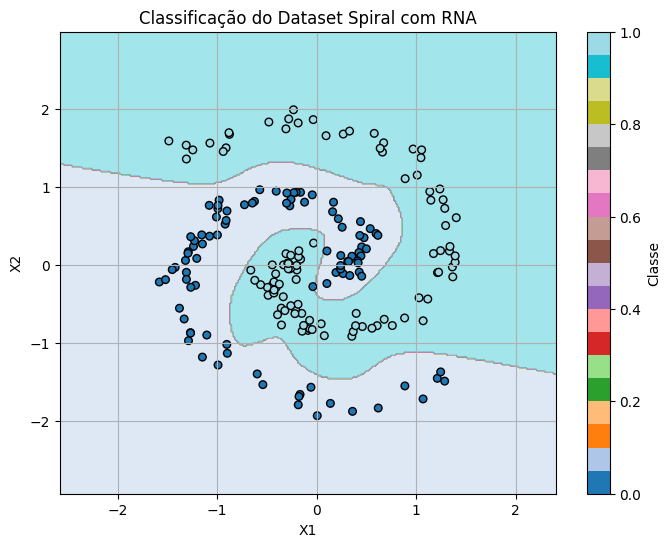

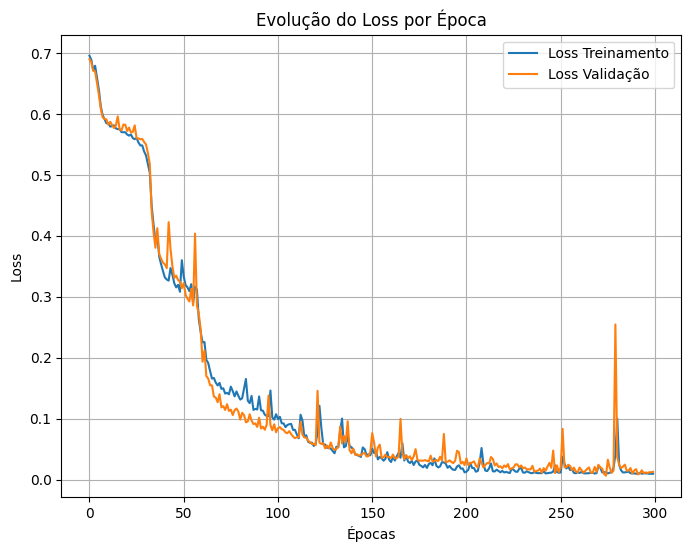

In [15]:
# Separar features e target
X = spiral_data[['X1', 'X2']]
y = spiral_data['y']

# Dividir o dataset (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(2,)),
    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(4, activation='sigmoid'),
    Dense(2, activation='linear')  # saída linear para 2 classes
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              #loss='sparse_categorical_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Fazer previsões no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))

# Plotar gráfico com fronteiras de decisão
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='tab20', alpha=0.4)
plt.scatter(X_test['X1'], X_test['X2'], c=y_test, cmap='tab20', edgecolor='k', s=30)
plt.title('Classificação do Dataset Spiral com RNA')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe')
plt.show()

# Plotar gráficos de Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
